<a href="https://colab.research.google.com/github/saranshchandawar/House-Of-Pool/blob/main/TAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

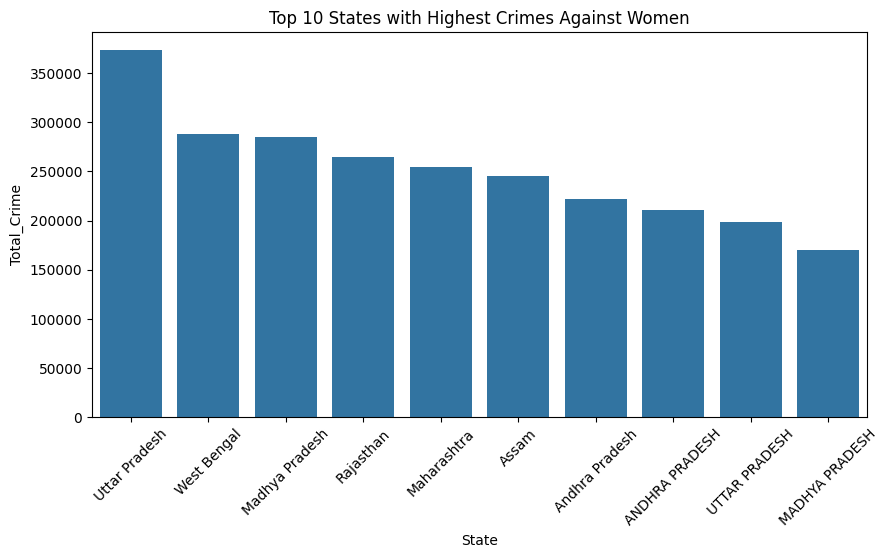

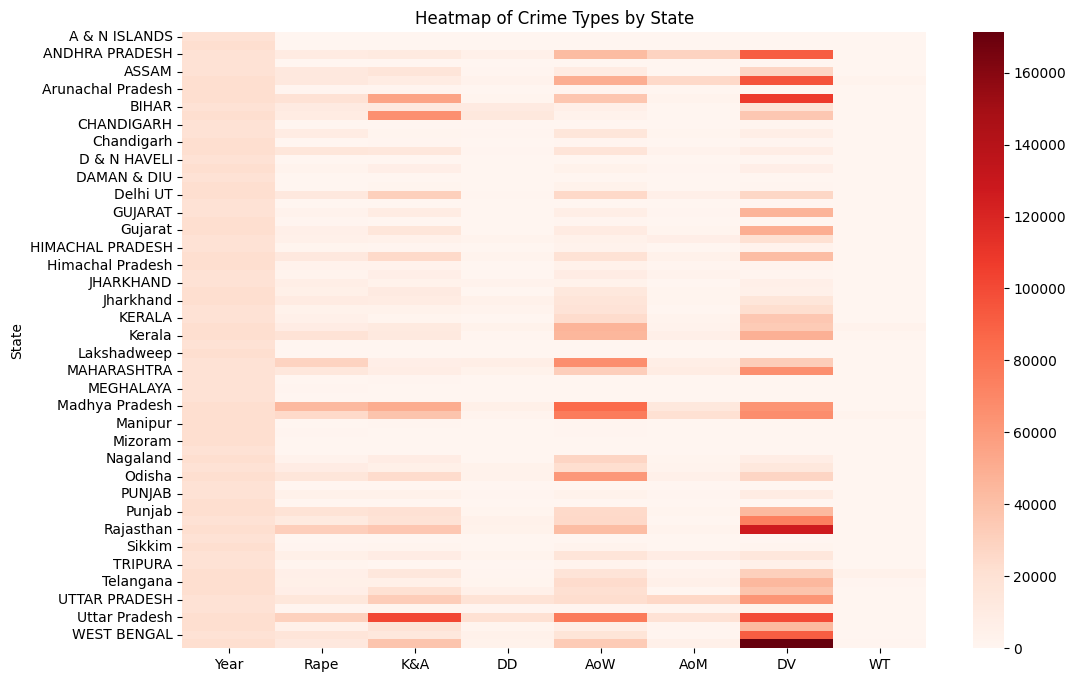

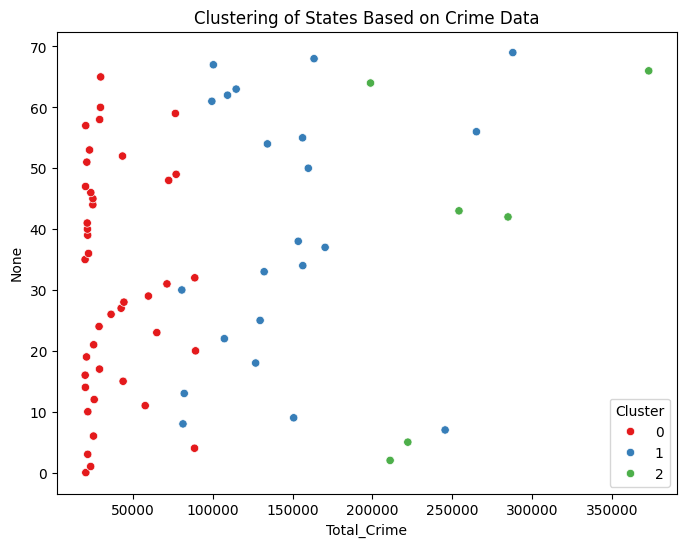

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load datasets
crime_df = pd.read_csv("CrimesOnWomenData.csv")
desc_df = pd.read_csv("description.csv")

# Drop unwanted columns
crime_df = crime_df.drop(columns=["Unnamed: 0"], errors="ignore")

# Handle missing values
crime_df = crime_df.fillna(0)

# Aggregate state-wise crime data
state_crime = crime_df.groupby("State").sum().reset_index()

# --------- 1. States with Highest Crime ----------
state_crime["Total_Crime"] = state_crime.iloc[:, 1:].sum(axis=1)
top_states = state_crime.sort_values("Total_Crime", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=top_states["State"].head(10), y=top_states["Total_Crime"].head(10))
plt.xticks(rotation=45)
plt.title("Top 10 States with Highest Crimes Against Women")
plt.show()

# --------- 2. Crime Type Heatmap ----------
plt.figure(figsize=(12,8))
sns.heatmap(state_crime.set_index("State").iloc[:, :-1], cmap="Reds")
plt.title("Heatmap of Crime Types by State")
plt.show()

# --------- 3. Clustering States ----------
scaler = StandardScaler()
scaled_data = scaler.fit_transform(state_crime.iloc[:, 1:-1])

kmeans = KMeans(n_clusters=3, random_state=42)
state_crime["Cluster"] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8,6))
sns.scatterplot(x=state_crime["Total_Crime"], y=state_crime.index,
                hue=state_crime["Cluster"], palette="Set1")
plt.title("Clustering of States Based on Crime Data")
plt.show()
